In [3]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.pipeline import run_process

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Load all datasets

In [5]:
# Force Plate
df_fp_open = pd.read_csv("../data/processed/ML_datasets/oa_averages_open_fp.csv")
df_fp_closed = pd.read_csv("../data/processed/ML_datasets/oa_averages_closed_fp.csv")

# Zed
df_zed_open = pd.read_csv("../data/processed/ML_datasets/oa_averages_open_zed.csv")
df_zed_closed = pd.read_csv("../data/processed/ML_datasets/oa_averages_closed_zed.csv")

# Front Phone
df_front_open = pd.read_csv("../data/processed/ML_datasets/oa_averages_open_front.csv")
df_front_closed = pd.read_csv("../data/processed/ML_datasets/oa_averages_closed_front.csv")

# Back Phone
df_back_open = pd.read_csv("../data/processed/ML_datasets/oa_averages_open_back.csv")
df_back_closed = pd.read_csv("../data/processed/ML_datasets/oa_averages_closed_back.csv")


In [6]:
df_fp_closed.head(2)

,participant name,gender,age,height,weight,foot length,foot width,faller,low stability,AP MAD,AP Max abs dev,AP RMS,AP Range,Ellipse area,ML MAD,ML Max abs dev,ML RMS,ML Range,Sway RMS
0,dida,female,79,156.0,67.0,28.0,11.5,0,0,0.541914,2.413038,0.701916,4.026925,9.240993,0.536572,2.280691,0.677683,3.820725,0.979758
1,ronald,male,80,176.0,89.0,32.0,12.0,0,0,0.685373,2.944936,0.872391,4.902800,11.356841,0.557594,2.062567,0.705783,3.559700,1.133310


Remove demographic features

In [7]:
columns_to_remove = ["participant name", "age", "gender", "height", "weight", "foot length", "foot width"]

# Force Plate
df_fp_open = df_fp_open.drop(columns=columns_to_remove)
df_fp_closed = df_fp_closed.drop(columns=columns_to_remove)

# Zed
df_zed_open = df_zed_open.drop(columns=columns_to_remove)
df_zed_closed = df_zed_closed.drop(columns=columns_to_remove)

# Front Phone
df_front_open = df_front_open.drop(columns=columns_to_remove)
df_front_closed = df_front_closed.drop(columns=columns_to_remove)

# Back Phone
df_back_open = df_back_open.drop(columns=columns_to_remove)
df_back_closed = df_back_closed.drop(columns=columns_to_remove)

In [11]:
PROCESSES = [
    ("ForcePlate-Open",   df_fp_open),
    ("ForcePlate-Closed", df_fp_closed),
    ("ZED-Open",          df_zed_open),
    ("ZED-Closed",        df_zed_closed),
    ("Front-Open",        df_front_open),
    ("Front-Closed",      df_front_closed),
    ("Back-Open",         df_back_open),
    ("Back-Closed",       df_back_closed)
]

## Classify by low stability

### Using F1 score to evaluate

In [11]:
all_results = {}
for name, df_proc in PROCESSES:
    print("="*70)
    print(f"Running: {name}")
    print("="*70)

     # Drop faller column just for this run
    df_proc_tmp = df_proc.drop(columns=["faller"], errors="ignore")

    all_results[name] = run_process(name, df_proc_tmp, target_col="low stability", plots_dir="plots_low_stability")

Running: ForcePlate - Open

[ForcePlate - Open] LogReg
  F1: 0.320 | Precision: 0.267 | Recall: 0.400
  Most chosen LR params (top 5):
    {'clf__C': np.float64(0.001), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l1', 'corr': CorrelationFilter(threshold=0.85)} → 30 folds
    {'clf__C': np.float64(0.01), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 4 folds
    {'clf__C': np.float64(0.001), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 3 folds
    {'clf__C': np.float64(1.0), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 1 folds
  Saved final tuned model → c:\fall_risk_analysis\machine_learning\machine_learning\trained_models\ForcePlate_-_Open_LogReg_f1.joblib

[ForcePlate - Open] DecisionTree
  F1: 0.636 | Precision: 0.583 | Recall: 0.700
  Most chosen DT params (top 5):
    {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 2} → 26 folds
    

In [ ]:
# Assuming all_results is your nested dict
rows = []

for dataset, models in all_results.items():
    for model_name, metrics in models.items():
        rows.append({
            "dataset": dataset,   # e.g. "ZED - Open"
            "model": model_name,  # e.g. "LogReg" / "DecisionTree"
            "f1": float(metrics["f1"]),
            "precision": float(metrics["precision"]),
            "recall": float(metrics["recall"]),
            "AP": float(metrics["AP"])
        })

df_results = pd.DataFrame(rows).round(3)
df_results

,dataset,model,f1,precision,recall,AP
0,ForcePlate - Open,LogReg,0.320000,0.266667,0.400000,0.220882
1,ForcePlate - Open,DecisionTree,0.636364,0.583333,0.700000,0.459372
2,ForcePlate - Closed,LogReg,0.450000,0.290323,1.000000,0.307787
3,ForcePlate - Closed,DecisionTree,0.416667,0.333333,0.555556,0.431390
4,ZED - Open,LogReg,0.307692,0.250000,0.400000,0.227394
5,ZED - Open,DecisionTree,0.357143,0.277778,0.500000,0.404503
6,ZED - Closed,LogReg,0.466667,0.333333,0.777778,0.425932
7,ZED - Closed,DecisionTree,0.400000,0.312500,0.555556,0.514944
8,Front - Open,LogReg,0.250000,0.214286,0.300000,0.219301
9,Front - Open,DecisionTree,0.533333,0.400000,0.800000,0.332632


#### Using F2 score

In [14]:
all_results_f2 = {}
for name, df_proc in PROCESSES:
    print("="*70)
    print(f"Running: {name}")
    print("="*70)

     # Drop faller column just for this run
    df_proc_tmp = df_proc.drop(columns=["faller"], errors="ignore")

    all_results_f2[name] = run_process(name, df_proc_tmp, target_col="low stability", plots_dir="plots_low_stability_f2", score_metric="f2")

Running: ForcePlate-Open

[ForcePlate-Open] LogReg
  F1: 0.320 | Precision: 0.267 | Recall: 0.400 | F2: 0.364
  Most chosen LR params (top 5):
    {'clf__C': np.float64(0.001), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l1', 'corr': CorrelationFilter(threshold=0.85)} → 30 folds
    {'clf__C': np.float64(0.01), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 4 folds
    {'clf__C': np.float64(0.001), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 3 folds
    {'clf__C': np.float64(1.0), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 1 folds
  Saved final tuned model → c:\fall_risk_analysis\machine_learning\machine_learning\trained_models\ForcePlate-Open_LogReg_f2.joblib

[ForcePlate-Open] DecisionTree
  F1: 0.636 | Precision: 0.583 | Recall: 0.700 | F2: 0.673
  Most chosen DT params (top 5):
    {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 2}

In [17]:
# Assuming all_results is your nested dict
rows = []

for dataset, models in all_results_f2.items():
    for model_name, metrics in models.items():
        rows.append({
            "dataset": dataset,   # e.g. "ZED - Open"
            "model": model_name,  # e.g. "LogReg" / "DecisionTree"
            "f2": float(metrics["F2"]),
            "precision": float(metrics["precision"]),
            "recall": float(metrics["recall"]),
            "AP": float(metrics["AP"])
        })

df_results_f2 = pd.DataFrame(rows)
df_results_f2

,dataset,model,f2,precision,recall,AP
0,ForcePlate-Open,LogReg,0.363636,0.266667,0.400000,0.220882
1,ForcePlate-Open,DecisionTree,0.673077,0.583333,0.700000,0.459372
2,ForcePlate-Closed,LogReg,0.671642,0.290323,1.000000,0.307787
3,ForcePlate-Closed,DecisionTree,0.490196,0.333333,0.555556,0.431390
4,ZED-Open,LogReg,0.357143,0.250000,0.400000,0.227394
5,ZED-Open,DecisionTree,0.431034,0.277778,0.500000,0.404503
6,ZED-Closed,LogReg,0.614035,0.333333,0.777778,0.425932
7,ZED-Closed,DecisionTree,0.480769,0.312500,0.555556,0.514944
8,Front-Open,LogReg,0.277778,0.214286,0.300000,0.219301
9,Front-Open,DecisionTree,0.666667,0.400000,0.800000,0.332632


#### Using combined eyes open and eyes closed data

In [ ]:
def _combine_states_wide(df_open: pd.DataFrame, df_closed: pd.DataFrame) -> pd.DataFrame:
    """
    Inner-join on 'participant name'.
    Targets: ['faller', 'low stability'] kept once.
    All other non-key columns become features with _open/_closed suffixes.
    """
    key = "participant name"
    targets = ["faller", "low stability"]

    feats_open   = [c for c in df_open.columns   if c not in [key] + targets]
    feats_closed = [c for c in df_closed.columns if c not in [key] + targets]

    o = df_open[[key] + targets + feats_open].rename(columns={c: f"{c}_open" for c in feats_open})
    c = df_closed[[key] + targets + feats_closed].rename(columns={c: f"{c}_closed" for c in feats_closed})

    merged = pd.merge(o, c, on=key, how="inner")

    # collapse duplicate targets (take from open side)
    for t in targets:
        tx, ty = f"{t}_x", f"{t}_y"
        if tx in merged.columns or ty in merged.columns:
            if tx in merged.columns:
                merged.rename(columns={tx: t}, inplace=True)
            if ty in merged.columns:
                merged.drop(columns=[ty], inplace=True, errors="ignore")

    open_cols   = [c for c in merged.columns if c.endswith("_open")]
    closed_cols = [c for c in merged.columns if c.endswith("_closed")]
    return merged[[key] + targets + open_cols + closed_cols]


def load_and_combine_all_devices(base_dir: str = "../data/processed/ML_datasets/"):
    """
    Loads all device CSVs from base_dir, drops DROP_COLS, combines open+closed
    per device (wide), and returns 4 DataFrames: (fp, zed, front, back).
    """
    DROP_COLS = ["age", "gender", "height", "weight", "foot length", "foot width"]
    # Force Plate
    df_fp_open   = pd.read_csv(f"{base_dir}oa_averages_open_fp.csv").drop(columns=DROP_COLS, errors="ignore")
    df_fp_closed = pd.read_csv(f"{base_dir}oa_averages_closed_fp.csv").drop(columns=DROP_COLS, errors="ignore")

    # ZED
    df_zed_open   = pd.read_csv(f"{base_dir}oa_averages_open_zed.csv").drop(columns=DROP_COLS, errors="ignore")
    df_zed_closed = pd.read_csv(f"{base_dir}oa_averages_closed_zed.csv").drop(columns=DROP_COLS, errors="ignore")

    # Front Phone
    df_front_open   = pd.read_csv(f"{base_dir}oa_averages_open_front.csv").drop(columns=DROP_COLS, errors="ignore")
    df_front_closed = pd.read_csv(f"{base_dir}oa_averages_closed_front.csv").drop(columns=DROP_COLS, errors="ignore")

    # Back Phone
    df_back_open   = pd.read_csv(f"{base_dir}oa_averages_open_back.csv").drop(columns=DROP_COLS, errors="ignore")
    df_back_closed = pd.read_csv(f"{base_dir}oa_averages_closed_back.csv").drop(columns=DROP_COLS, errors="ignore")

    # Combine wide per device
    df_fp_both    = _combine_states_wide(df_fp_open,   df_fp_closed)
    df_zed_both   = _combine_states_wide(df_zed_open,  df_zed_closed)
    df_front_both = _combine_states_wide(df_front_open,df_front_closed)
    df_back_both  = _combine_states_wide(df_back_open, df_back_closed)

    return df_fp_both, df_zed_both, df_front_both, df_back_both

In [24]:
df_fp_both, df_zed_both, df_front_both, df_back_both = load_and_combine_all_devices()

KeyError: "['participant_name'] not in index"

## Classify by fallers

In [ ]:
all_results_fallers = {}
for name, df_proc in PROCESSES:
    print("="*70)
    print(f"Running: {name}")
    print("="*70)

    # Drop low stability column just for this run
    df_proc_tmp = df_proc.drop(columns=["low stability"], errors="ignore")
    all_results_fallers[name] = run_process(name, df_proc_tmp, target_col="faller", plots_dir="plots_faller")

Running: ForcePlate-Open

[ForcePlate-Open] LogReg
  F1: 0.667 | Precision: 0.571 | Recall: 0.800
  Most chosen LR params (top 5):
    {'clf__C': np.float64(0.001), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l1', 'corr': CorrelationFilter(threshold=0.85)} → 24 folds
    {'clf__C': np.float64(0.001), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 8 folds
    {'clf__C': np.float64(0.1), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 5 folds
    {'clf__C': np.float64(1.0), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l1', 'corr': CorrelationFilter(threshold=0.85)} → 1 folds
  Saved final tuned model → c:\fall_risk_analysis\machine_learning\machine_learning\trained_models\ForcePlate-Open_LogReg_f1.joblib

[ForcePlate-Open] DecisionTree
  F1: 0.353 | Precision: 0.250 | Recall: 0.600
  Most chosen DT params (top 5):
    {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__min_samples_leaf': 1} → 33 folds
    {'clf__cr

In [13]:
# Assuming all_results is your nested dict
rows = []

for dataset, models in all_results_fallers.items():
    for model_name, metrics in models.items():
        rows.append({
            "dataset": dataset,   # e.g. "ZED - Open"
            "model": model_name,  # e.g. "LogReg" / "DecisionTree"
            "f1": float(metrics["f1"]),
            "precision": float(metrics["precision"]),
            "recall": float(metrics["recall"]),
            "AP": float(metrics["AP"])
        })

df_results_faller = pd.DataFrame(rows)
df_results_faller

,dataset,model,f1,precision,recall,AP
0,ForcePlate-Open,LogReg,0.666667,0.571429,0.80,0.479649
1,ForcePlate-Open,DecisionTree,0.352941,0.250000,0.60,0.352632
2,ForcePlate-Closed,LogReg,0.000000,0.000000,0.00,0.072801
3,ForcePlate-Closed,DecisionTree,0.266667,0.181818,0.50,0.304054
4,ZED-Open,LogReg,0.615385,0.500000,0.80,0.351306
5,ZED-Open,DecisionTree,0.222222,0.153846,0.40,0.238947
6,ZED-Closed,LogReg,0.121212,0.068966,0.50,0.093301
7,ZED-Closed,DecisionTree,0.200000,0.166667,0.25,0.164414
8,Front-Open,LogReg,0.750000,1.000000,0.60,0.727350
9,Front-Open,DecisionTree,0.600000,0.600000,0.60,0.412632


#### Using F2 score

In [18]:
all_results_fallers_f2 = {}
for name, df_proc in PROCESSES:
    print("="*70)
    print(f"Running: {name}")
    print("="*70)

    # Drop low stability column just for this run
    df_proc_tmp = df_proc.drop(columns=["low stability"], errors="ignore")
    all_results_fallers_f2[name] = run_process(name, df_proc_tmp, target_col="faller", plots_dir="plots_faller_f2", score_metric="f2")

Running: ForcePlate-Open

[ForcePlate-Open] LogReg
  F1: 0.667 | Precision: 0.571 | Recall: 0.800 | F2: 0.741
  Most chosen LR params (top 5):
    {'clf__C': np.float64(0.001), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l1', 'corr': CorrelationFilter(threshold=0.85)} → 24 folds
    {'clf__C': np.float64(0.001), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 8 folds
    {'clf__C': np.float64(0.1), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'corr': CorrelationFilter(threshold=0.85)} → 5 folds
    {'clf__C': np.float64(1.0), 'clf__l1_ratio': 0.5, 'clf__penalty': 'l1', 'corr': CorrelationFilter(threshold=0.85)} → 1 folds
  Saved final tuned model → c:\fall_risk_analysis\machine_learning\machine_learning\trained_models\ForcePlate-Open_LogReg_f2.joblib

[ForcePlate-Open] DecisionTree
  F1: 0.353 | Precision: 0.250 | Recall: 0.600 | F2: 0.469
  Most chosen DT params (top 5):
    {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__min_samples_leaf': 1} 

In [19]:
# Assuming all_results is your nested dict
rows = []

for dataset, models in all_results_fallers_f2.items():
    for model_name, metrics in models.items():
        rows.append({
            "dataset": dataset,   # e.g. "ZED - Open"
            "model": model_name,  # e.g. "LogReg" / "DecisionTree"
            "f2": float(metrics["F2"]),
            "precision": float(metrics["precision"]),
            "recall": float(metrics["recall"]),
            "AP": float(metrics["AP"])
        })

all_results_fallers_f2 = pd.DataFrame(rows)
all_results_fallers_f2

,dataset,model,f2,precision,recall,AP
0,ForcePlate-Open,LogReg,0.740741,0.571429,0.80,0.479649
1,ForcePlate-Open,DecisionTree,0.468750,0.250000,0.60,0.352632
2,ForcePlate-Closed,LogReg,0.000000,0.000000,0.00,0.072801
3,ForcePlate-Closed,DecisionTree,0.370370,0.181818,0.50,0.304054
4,ZED-Open,LogReg,0.714286,0.500000,0.80,0.351306
5,ZED-Open,DecisionTree,0.303030,0.153846,0.40,0.238947
6,ZED-Closed,LogReg,0.222222,0.068966,0.50,0.093301
7,ZED-Closed,DecisionTree,0.227273,0.166667,0.25,0.164414
8,Front-Open,LogReg,0.652174,1.000000,0.60,0.727350
9,Front-Open,DecisionTree,0.600000,0.600000,0.60,0.412632


## PCA

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---- 1. Load data ----
df_fp_closed = pd.read_csv("../data/processed/ML_datasets/oa_averages_closed_fp.csv")
columns_to_remove = ["age", "gender", "height", "weight", "foot length", "foot width"]
df_fp_closed = df_fp_closed.drop(columns=columns_to_remove)

# Remove non-feature columns
features = df_fp_closed.drop(columns=["participant name", "low stability", "faller"])
feature_names = features.columns

# ---- 2. Standardize ----
X_scaled = StandardScaler().fit_transform(features)

# ---- 3. PCA ----
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# ---- 4. Explained variance ----
explained_var = pca.explained_variance_ratio_
print("Explained variance ratio per PC:")
for i, var in enumerate(explained_var, start=1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

print("\nCumulative variance explained:")
print(np.cumsum(explained_var))

# ---- 5. Loading scores (components) ----
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i}" for i in range(1, len(feature_names)+1)],
    index=feature_names
)

print("\nLoading scores (first few PCs):")
print(loadings.iloc[:, :5])  # just show first 5 PCs

Explained variance ratio per PC:
PC1: 0.9414 (94.14%)
PC2: 0.0327 (3.27%)
PC3: 0.0158 (1.58%)
PC4: 0.0053 (0.53%)
PC5: 0.0031 (0.31%)
PC6: 0.0010 (0.10%)
PC7: 0.0004 (0.04%)
PC8: 0.0001 (0.01%)
PC9: 0.0000 (0.00%)
PC10: 0.0000 (0.00%)

Cumulative variance explained:
[0.94139296 0.97413569 0.98997673 0.99531927 0.99844401 0.99947791
 0.99985728 0.99993586 0.99997894 1.        ]

Loading scores (first few PCs):
                     PC1       PC2       PC3       PC4       PC5
AP MAD          0.311879 -0.389888 -0.442965 -0.103060  0.282879
AP Max abs dev  0.311980 -0.306650  0.535641 -0.173601 -0.243665
AP RMS          0.316035 -0.374668 -0.278696 -0.084470  0.146285
AP Range        0.316848 -0.294132  0.313537 -0.132253 -0.377112
Ellipse area    0.317965 -0.035272  0.032507  0.943215 -0.063237
ML MAD          0.312334  0.435683 -0.272726 -0.138337 -0.455228
ML Max abs dev  0.317663  0.276638  0.281393 -0.078465  0.575851
ML RMS          0.315826  0.405452 -0.181045 -0.072952 -0.210459
ML

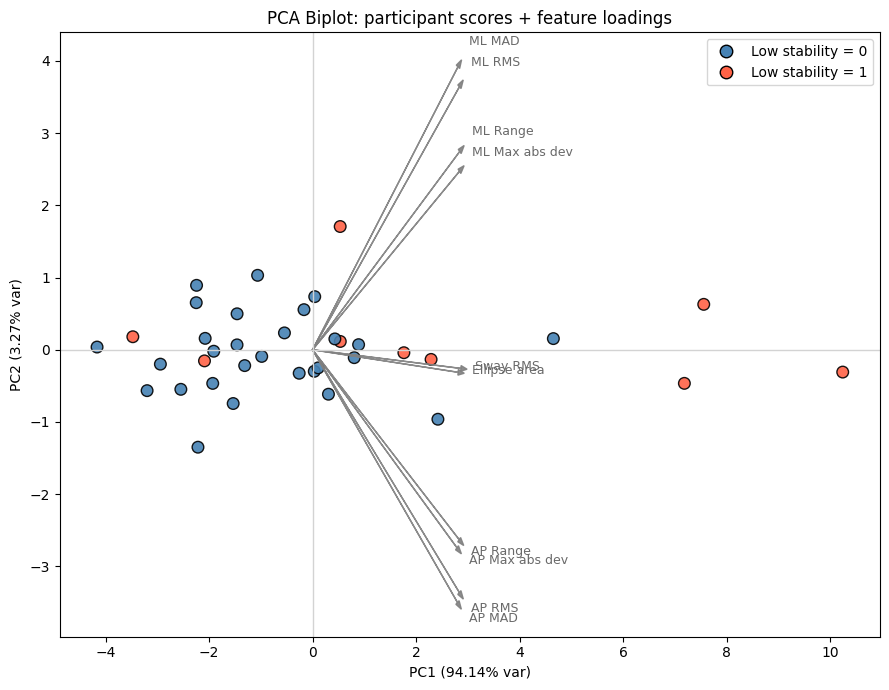

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ---- 1) Prepare data (example: df_fp_closed already loaded) ----
features_df = df_fp_closed.drop(columns=[c for c in ["participant name", "low stability", "faller"] if c in df_fp_closed.columns])
feature_names = features_df.columns.to_list()
participants = df_fp_closed["participant name"].to_numpy()
y = df_fp_closed["low stability"].to_numpy()

# ---- 2) Scale & PCA (2 PCs for biplot) ----
X_scaled = StandardScaler().fit_transform(features_df.values)
pca = PCA(n_components=2, random_state=42)
scores = pca.fit_transform(X_scaled)              # (n_samples, 2)
loadings = pca.components_.T                      # (n_features, 2)
expl = pca.explained_variance_ratio_ * 100        # %

# ---- 3) Build the biplot ----
plt.figure(figsize=(9, 7))

# (a) scatter of participant scores, colored by low stability
colors = np.where(y == 1, "tomato", "steelblue")
plt.scatter(scores[:, 0], scores[:, 1], c=colors, s=70, edgecolor="k", alpha=0.9, label=None)

# Optional: legend for groups
from matplotlib.lines import Line2D
legend_elems = [
    Line2D([0],[0], marker='o', color='w', label='Low stability = 0', markerfacecolor='steelblue', markeredgecolor='k', markersize=9),
    Line2D([0],[0], marker='o', color='w', label='Low stability = 1', markerfacecolor='tomato', markeredgecolor='k', markersize=9),
]
plt.legend(handles=legend_elems, loc="upper right", frameon=True)

# Optional: annotate participant names (comment out if cluttered)
# for i, name in enumerate(participants):
#     plt.text(scores[i,0], scores[i,1], f" {name}", fontsize=8, va="center")

# (b) feature loading arrows
# scale arrows to a nice length relative to score spread
score_max = np.max(np.abs(scores[:, :2]))  # for heuristic scaling
arrow_scale = 0.9 * score_max

for i, fname in enumerate(feature_names):
    x, yv = loadings[i, 0] * arrow_scale, loadings[i, 1] * arrow_scale
    plt.arrow(0, 0, x, yv, width=0.002, head_width=0.08, length_includes_head=True, color="gray", alpha=0.9)
    # label a bit offset from arrow tip
    plt.text(x * 1.05, yv * 1.05, fname, fontsize=9, color="dimgray")

# cosmetics
plt.axhline(0, color="lightgray", lw=1)
plt.axvline(0, color="lightgray", lw=1)
plt.xlabel(f"PC1 ({expl[0]:.2f}% var)")
plt.ylabel(f"PC2 ({expl[1]:.2f}% var)")
plt.title("PCA Biplot: participant scores + feature loadings")
plt.tight_layout()
plt.show()


## Fuzzy C-Means

In [21]:
df_fp_closed = pd.read_csv("../data/processed/ML_datasets/oa_averages_closed_fp.csv")
df_fp_open = pd.read_csv("../data/processed/ML_datasets/oa_averages_open_fp.csv")
df_zed_closed = pd.read_csv("../data/processed/ML_datasets/oa_averages_closed_zed.csv")
df_zed_open = pd.read_csv("../data/processed/ML_datasets/oa_averages_open_zed.csv")

columns_to_remove = ["age", "gender", "height", "weight", "foot length", "foot width"]

df_fp_closed = df_fp_closed.drop(columns=columns_to_remove)
df_fp_open = df_fp_open.drop(columns=columns_to_remove)
df_zed_closed = df_zed_closed.drop(columns=columns_to_remove)
df_zed_open = df_zed_open.drop(columns=columns_to_remove)


In [22]:
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler

def fuzzy_c_means(df):
    # X = features only (no labels)
    X = df.drop(columns=["participant name", "low stability", "faller"]).values
    X = StandardScaler().fit_transform(X).T  # scikit-fuzzy expects features as rows

    # Run fuzzy c-means with 2 clusters
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X, c=2, m=2, error=0.005, maxiter=1000, init=None, seed=42
    )

    # u.T gives membership probabilities for each participant
    memberships = pd.DataFrame(u.T, columns=["cluster0", "cluster1"])
    memberships["participant name"] = df["participant name"].values
    memberships["low stability"] = df["low stability"].values
    memberships["faller"] = df["faller"].values

    return memberships, fpc

In [23]:
fp_closed_membership, fp_closed_fpc = fuzzy_c_means(df_fp_closed)

In [24]:
print(fp_closed_fpc.round(3))

0.899


In [25]:
fp_closed_membership

,cluster0,cluster1,participant name,low stability,faller
0,0.007696,0.992304,dida,0,0
1,0.051789,0.948211,ronald,0,0
2,0.073938,0.926062,inez,0,0
3,0.003390,0.996610,shalom,0,0
4,0.094051,0.905949,yaacov,0,0
5,0.913636,0.086364,moshe,1,1
6,0.000773,0.999227,meir,0,0
7,0.029089,0.970911,yaacov_e,0,0
8,0.835417,0.164583,yossi,0,0
9,0.035851,0.964149,batya,0,0


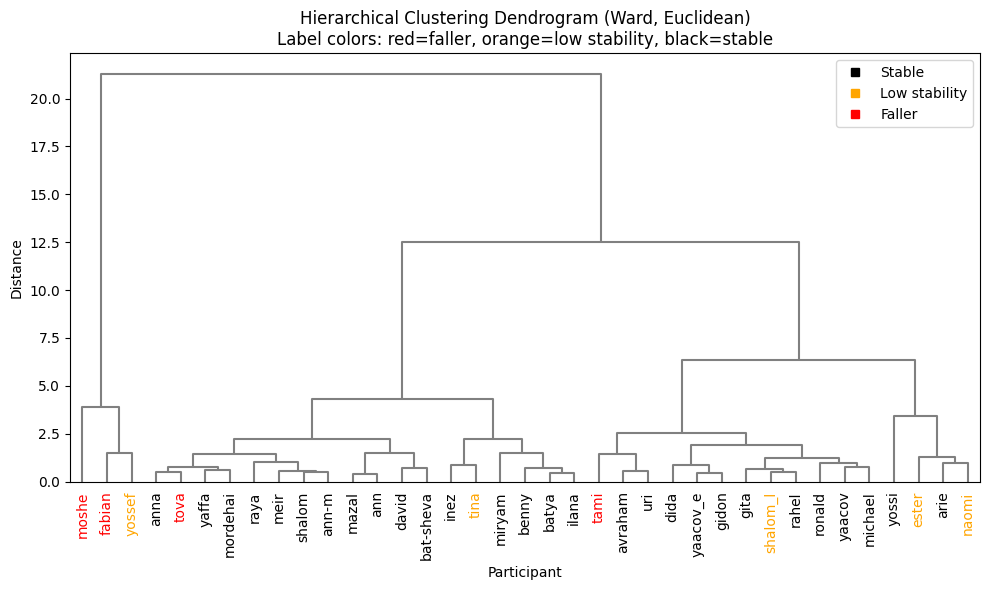

In [26]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# ---------- 1) Load & prep ----------
df_fp_closed = pd.read_csv("../data/processed/ML_datasets/oa_averages_closed_fp.csv")

# drop demographics if present
columns_to_remove = ["age", "gender", "height", "weight", "foot length", "foot width"]
columns_to_remove = [c for c in columns_to_remove if c in df_fp_closed.columns]
df_fp_closed = df_fp_closed.drop(columns=columns_to_remove)

# extract arrays
participants = df_fp_closed["participant name"].values
y = df_fp_closed["low stability"].values.astype(int)

# faller column may or may not exist; if not, create zeros
if "faller" in df_fp_closed.columns:
    f = df_fp_closed["faller"].values.astype(int)
else:
    f = np.zeros_like(y)

X = df_fp_closed.drop(columns=[c for c in ["participant name", "low stability", "faller"] if c in df_fp_closed.columns]).values

# ---------- 2) Scale ----------
X_scaled = StandardScaler().fit_transform(X)

# ---------- 3) Hierarchical clustering (Ward + Euclidean) ----------
Z = linkage(X_scaled, method="ward", metric="euclidean")

# ---------- 4) Dendrogram with color-coded labels ----------
def label_color(idx):
    # idx is the index of the participant in 'participants'
    if f[idx] == 1:
        return "red"         # faller
    elif y[idx] == 1:
        return "orange"      # low stability (non-faller)
    else:
        return "black"       # stable

plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=participants,
    leaf_rotation=90,
    leaf_font_size=10,
    link_color_func=lambda k: "grey",  # keep branches grey (optional)
    color_threshold=0                  # avoid auto branch coloring
)

# Recolor tick labels by group
ax = plt.gca()
for lbl in ax.get_xmajorticklabels():
    name = lbl.get_text()
    idx = np.where(participants == name)[0][0]
    lbl.set_color(label_color(idx))

# Simple legend
from matplotlib.lines import Line2D
legend_elems = [
    Line2D([0], [0], color="black", marker="s", lw=0, label="Stable"),
    Line2D([0], [0], color="orange", marker="s", lw=0, label="Low stability"),
    Line2D([0], [0], color="red", marker="s", lw=0, label="Faller"),
]
ax.legend(handles=legend_elems, loc="upper right", frameon=True)

plt.title("Hierarchical Clustering Dendrogram (Ward, Euclidean)\nLabel colors: red=faller, orange=low stability, black=stable")
plt.xlabel("Participant")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()